In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import multiprocessing
import time

In [2]:
N=10**6
num_mc_iters = 10**3
probabilities = [10**-4, 5*10**-4, 10**-3, 5*10**-3, 10**-2, 5*10**-2, 10**-1]

In [3]:
def find_multiples(num):
    multiples = []
    for i in range(1, num+1):
        if num%i == 0:
            multiples.append(i)
            
    return multiples

def run_mc(args):
    N, num_mc_iters, p, p_batch_and_num_tests = args
    batch_and_num_tests = dict()

    for k in find_multiples(N):
        num_tests = 0
        for _ in range(num_mc_iters):
            infected_set = set(random.sample(range(1, N+1), int(p*N)))

            def check_infected(batch):
                return len(batch) if len(set(batch).intersection(infected_set)) > 0 else 0


            batches = np.arange(1, N+1).reshape(N//k, k)
            result = sum(np.array(list(map(check_infected, batches))))
            num_tests += result
            num_tests += batches.shape[0]


        batch_and_num_tests[k] = num_tests/num_mc_iters
        
    p_batch_and_num_tests[p] = batch_and_num_tests
    
    return p_batch_and_num_tests

In [4]:
start_time = time.perf_counter()
processes = []

manager = multiprocessing.Manager()
p_batch_and_num_tests = manager.dict()

for i in range(len(probabilities)):
    args = [N, num_mc_iters, probabilities[i], p_batch_and_num_tests]
    p = multiprocessing.Process(target = run_mc, args=(args,))
    p.start()
    processes.append(p)

# Joins all the processes 
for p in processes:
    p.join()

finish_time = time.perf_counter()

print(f"Program finished in {finish_time-start_time} seconds")

Program finished in 18031.130399459005 seconds


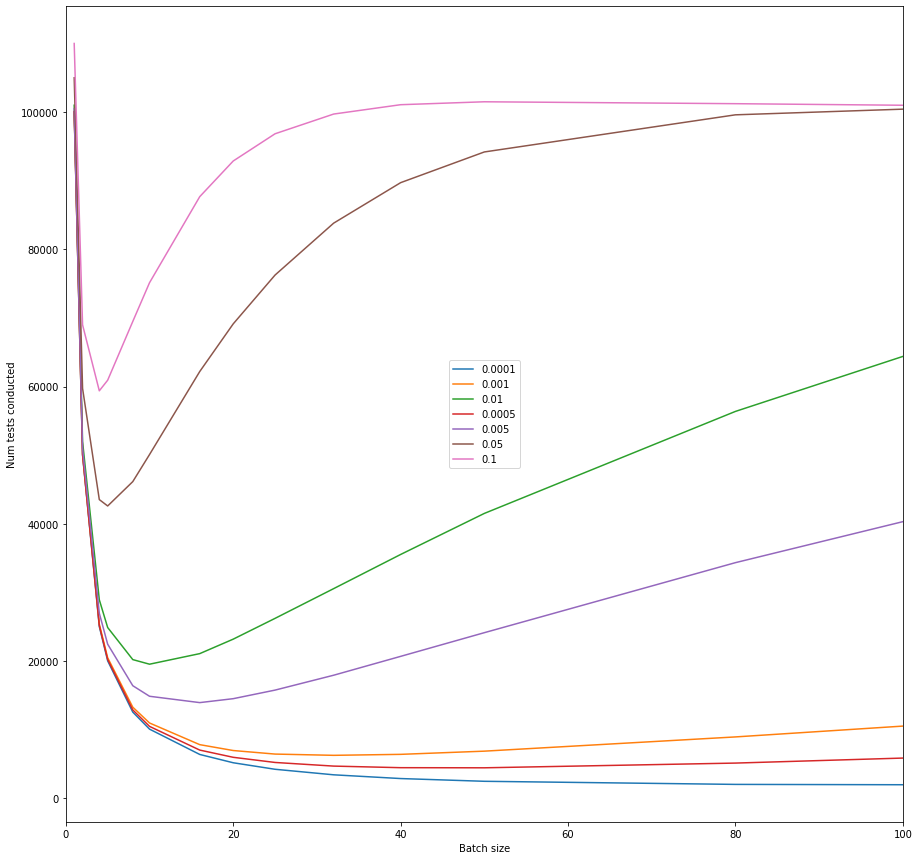

In [10]:
plt.figure(figsize=(15, 15))

for p, p_data in p_batch_and_num_tests.items():
    plt.plot(p_data.keys(), p_data.values(), label=p)
    
plt.xlim(0, 100)
plt.xlabel("Batch size")
plt.ylabel("Num tests conducted")
plt.legend()